<a href="https://colab.research.google.com/github/ezequielfb/Classificador-MNIST/blob/main/Projeto_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
# Carrega o dataset e já o divide em partes de treino e de teste
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Temos {x_train.shape[0]} imagens para treino e {x_test.shape[0]} para teste.")
print(f"Cada imagem tem o tamanho de {x_train.shape[1]}x{x_train.shape[2]} pixels.")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Temos 60000 imagens para treino e 10000 para teste.
Cada imagem tem o tamanho de 28x28 pixels.


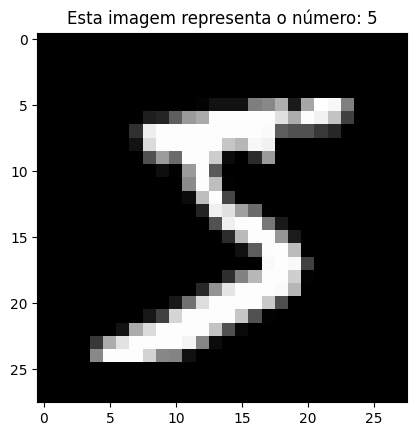

In [ ]:
# Normalizando os valores dos pixels dividindo por 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# Vamos dar uma olhada em uma imagem de exemplo para ver como ficou
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Esta imagem representa o número: {y_train[0]}")
plt.show()

In [ ]:
model = keras.Sequential([
    # 1ª Camada (Entrada): Achata a imagem de 28x28 pixels em uma única linha de 784 pixels.
    keras.layers.Flatten(input_shape=(28, 28)),

    # 2ª Camada (Oculta): Uma camada "densa" com 128 neurônios para aprender os padrões.
    # A função de ativação 'relu' é uma escolha padrão e muito eficiente.
    keras.layers.Dense(128, activation='relu'),

    # 3ª Camada (Regularização): "Desliga" aleatoriamente 20% dos neurônios durante o treino
    # para evitar que a rede apenas "decore" as imagens, forçando-a a aprender de verdade.
    keras.layers.Dropout(0.2),

    # 4ª Camada (Saída): A camada final. Tem 10 neurônios, um para cada dígito (0 a 9).
    # A ativação 'softmax' transforma a saída em um conjunto de 10 probabilidades que somam 1.
    keras.layers.Dense(10, activation='softmax')
])

# Mostra um resumo da arquitetura que criamos
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("Iniciando o treinamento...")
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print("Treinamento finalizado!")

Iniciando o treinamento...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8582 - loss: 0.4895 - val_accuracy: 0.9604 - val_loss: 0.1371
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9551 - loss: 0.1513 - val_accuracy: 0.9692 - val_loss: 0.1024
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1119 - val_accuracy: 0.9732 - val_loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9741 - loss: 0.0841 - val_accuracy: 0.9741 - val_loss: 0.0819
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9768 - loss: 0.0752 - val_accuracy: 0.9762 - val_loss: 0.0752
Treinamento finalizado!


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'\nAcurácia final no conjunto de teste: {test_acc * 100:.2f}%')

313/313 - 1s - 2ms/step - accuracy: 0.9762 - loss: 0.0752

Acurácia final no conjunto de teste: 97.62%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


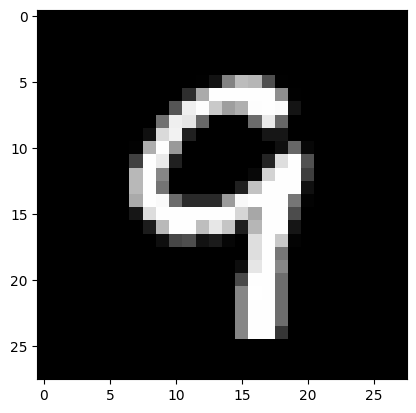

O modelo previu que este número é: 9
A resposta correta é: 9
O modelo acertou! 🎉


In [ ]:
# Fazendo previsões para todo o conjunto de teste
predictions = model.predict(x_test)

# Escolha um número de 0 a 9999 para testar uma imagem
index_da_imagem = 150 # Você pode mudar esse número!

# Mostra a imagem que estamos testando
plt.imshow(x_test[index_da_imagem], cmap='gray')
plt.show()

# A saída do modelo é um array de 10 probabilidades. O 'argmax' pega o índice com a maior probabilidade.
previsao_do_modelo = np.argmax(predictions[index_da_imagem])
resposta_correta = y_test[index_da_imagem]

print(f"O modelo previu que este número é: {previsao_do_modelo}")
print(f"A resposta correta é: {resposta_correta}")

if previsao_do_modelo == resposta_correta:
    print("O modelo acertou! 🎉")
else:
    print("O modelo errou. 😢")